In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import scipy as sp
from pylab import text
from soccerplots.radar_chart import Radar
import highlight_text
from functools import reduce

In [2]:
# PLAYER, POSITION, SEASON and COLOR Selection ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Player_1 = 'Jamie Vardy'
Player_2 = 'Álvaro Morata'
Competition = 'EPL'
Color_1 = 'white'
Color_2 = 'dodgerblue'
Season = '2017 - 2018'
Position = 'FW' #can be GK, DF, DFMF, DFFW, MFDF, MF, MFFW, FWDF, FWMF, FW, Blank - if multiple poisitons are to be selected select them manually in the filters section below

In [3]:
# How to Use --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# 1) PLAYER, POSITION, SEASON and COLOR Selection
# 2) FILTERS
# 3) METRICS
# 4) PARAMETERS

In [4]:
myfont = {'fontname':'DejaVu Sans'}

In [5]:
filenames = ['0-Standard.txt','1-Goalkeeping.txt','2-Advanced Goalkeeping.txt','3-Shooting.txt', '4-Passing.txt', '5-Pass Types.txt', '6-Goal and Shot Creation.txt', '7-Defensive Actions.txt', '8-Possession.txt', '9-Playing Time.txt', '10-Miscellaneous Stats.txt']

In [6]:
dataframe_list = [pd.read_csv(file_name) for file_name in filenames]

In [7]:
df0 = dataframe_list[0]
df0['Player_ID'] = df0['Player'].astype(str) + df0['Squad'].astype(str) # Workaround to correct duplicate GK stats
df1 = dataframe_list[1]
df1['Player_ID'] = df1['Player'].astype(str) + df1['Squad'].astype(str)
df2 = dataframe_list[2]
df2['Player_ID'] = df2['Player'].astype(str) + df2['Squad'].astype(str)
df3 = dataframe_list[3]
df3['Player_ID'] = df3['Player'].astype(str) + df3['Squad'].astype(str)
df4 = dataframe_list[4]
df4['Player_ID'] = df4['Player'].astype(str) + df4['Squad'].astype(str)
df5 = dataframe_list[5]
df5['Player_ID'] = df5['Player'].astype(str) + df5['Squad'].astype(str)
df6 = dataframe_list[6]
df6['Player_ID'] = df6['Player'].astype(str) + df6['Squad'].astype(str)
df7 = dataframe_list[7]
df7['Player_ID'] = df7['Player'].astype(str) + df7['Squad'].astype(str)
df8 = dataframe_list[8]
df8['Player_ID'] = df8['Player'].astype(str) + df8['Squad'].astype(str)
df9 = dataframe_list[9]
df9['Player_ID'] = df9['Player'].astype(str) + df9['Squad'].astype(str)
df10 = dataframe_list[10]
df10['Player_ID'] = df10['Player'].astype(str) + df10['Squad'].astype(str)

In [8]:
dataframes = [df0, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10] # to join 

In [9]:
df = reduce(lambda left,right: pd.merge(left,right,on=['Player','Player_ID'], how='outer'), dataframes)

In [10]:
df = df.drop_duplicates(['Player_ID']) # Workaround to drop duplicates while keeping players playing for multiple teams in the same competition
df = df.drop(['Player_ID'],axis =1)

In [11]:
df.columns = [
#Standard    
'Rank','Player', 'Nationality','Position','Team','Age','Born','Matches Played', 'Matches Started', 'Minutes Played', '90s Played', 'Goals', 'Assists', 'Non-Penalty Goals','Penalties Scored', 'Penalties Attempted', 'Yellow Cards', 'Red Cards', 'Goals per 90', 'Assists per 90', 'Goal Contributions per 90', 'Non-Penalty Goals per 90', 'Non-Penalty Goal Contributions per 90', 'xG', 'Non-Penalty xG', 'xA', 'Non-Penalty Expected Goal Contributions', 'xG per 90', 'xA per 90', 'Expected Goal Contributions per 90', 'Non-Penalty xG per 90', 'Non-Penalty Expected Goal Contributions per 90', 'Matches',
#Goalkeeping
'Rank','Nationality','Position','Team','Age','Born','Matches Played', 'Matches Started', 'Minutes Played', '90s Played', 'GK Goals Conceded', 'GK Goals Conceded per 90', 'GK Shots on Target Against', 'GK Saves', 'GK Save %', 'GK Wins', 'GK Draws', 'GK Losses', 'GK Clean Sheets', 'GK Clean Sheet %', 'GK Penalties Faced', 'GK Penalties Conceded', 'GK Penalties Saved', 'GK Penalties Off Target', 'GK Penalty Save %', 'Matches',
#Advanced Goalkeeping
'Rank','Nationality','Position','Team','Age','Born','90s Played', 'GK Goals Conceded', 'GK Penalties Conceded', 'GK Free Kicks Conceded', 'GK Corner Kicks Conceded', 'GK Own Goals Conceded', 'GK Post-Shot xG Against', 'GK Post-Shot xG Against per Shot on Target', 'GK Post-Shot xG Against PlusMinus', 'GK Post-Shot xG Against PlusMinus per 90', 'GK Long Passes Completed', 'GK Long Passes Attempted', 'GK Long Pass Completion %','GK Passes Attempted', 'GK Throws Attempted', 'GK Long Pass Preference %', 'GK Average Pass Length (Yd)', 'GK Goal Kicks Attempted', 'GK Long Goal Kick Preference %', 'GK Average Goal Kick Length (Yd)', 'GK Crosses Faced', 'GK Crosses Stopped', 'GK Cross Stoppage %', 'GK Sweeping Actions', 'GK Sweeping Actions per 90', 'GK Average Sweeping Action Distance From Goal (Yd)', 'Matches',
#Shooting
'Rank','Nationality','Position','Team','Age','Born','90s Played', 'Goals', 'Shots', 'Shots on Target', 'Shot Accuracy %', 'Shots per 90', 'Shots on Target per 90', 'Goals per Shot', 'Goals per Shots on Target', 'Average Shot Distance From Goal (Yd)', 'Direct Free Kicks Attempted', 'Penalties Scored', 'Penalties Attempted', 'xG', 'Non-Penalty xG', 'Non-Penalty xG per Shot', 'Goals - xG','Non-Penalty Goals - Non-Penalty xG', 'Matches', 
#Passing
'Rank','Nationality','Position','Team','Age','Born','90s Played', 'Passes Completed', 'Passes Attempted','Pass Completion %', 'Total Pass Distance (Yd)', 'Progressive Pass Distance (Yd)', 'Short Passes Completed', 'Short Passes Attempted','Short Pass Completion %','Medium Passes Completed', 'Medium Passes Attempted', 'Medium Pass Completion %', 'Long Passes Completed', 'Long Passes Attempted', 'Long Pass Completion %', 'Assists', 'xA', 'Assists - xA', 'Key Passes','Successful Passes into Final Third', 'Passes Completed into Opposition Box', 'Crosses Completed into Opposition Box', 'Progressive Passes', 'Matches',

#Pass Types
'Rank','Nationality','Position','Team','Age','Born', '90s Played', 'Passes Attempted', ' Live-Ball Passes', 'Dead-Ball Passes', 'Passes From Free Kicks', 'Through Balls Completed', 'Passes Completed Under Pressure', 'Flank Changes', 'Crosses Attempted', 'Corner Kicks Taken', 'In-Swinging Corner Kicks', 'Out-Swinging Corner Kicks', 'Straight Corner Kicks', 'Ground Passes','Low Passes','Lofted Passes','Left Footed Passes Attempted','Right Footed Passes Attempted','Headed Passes Attempted', 'Throw-Ins Taken','Other Body Part Passes Attempted','Passes Completed', 'Passes Leading to Offside', 'Passes Out of Bounds','Passes Intercepted by Opposition','Passes Blocked by Opposition','Matches',

#Goal and Shot Creation
'Rank','Nationality','Position','Team','Age','Born','90s Played','Shot Creating Actions','Shot Creating Actions per 90','Shot Creating Live-Ball Passes','Shot Creating Dead-Ball Passes','Shot Creating Dribbles', 'Shot Creating Shots', 'Shot Creating Fouls Won', 'Shot Creating Defensive Actions','Goal Creating Actions', 'Goal Creating Actions per 90', 'Goal Creating Live-Ball Passes','Goal Creating Dead-Ball Passes','Goal Creating Dribbles', 'Goal Creating Shots', 'Goal Creating Fouls Won', 'Goal Creating Defensive Actions', 'Own Goal Creating Actions', 'Matches',

#Defensive Actions
'Rank','Nationality','Position','Team','Age','Born','90s Played','Tackles Won','Ball-Winning Tackles','Tackles Won in the Defensive Third','Tackles Won in the Middle Third','Tackles Won in the Final Third','Tackles Won Against Dribblers','Tackles Attempted Against Dribblers','Tackles Won Against Dribblers %', 'Dribbled Past','Pressures','Successful Pressures','Pressure Success %', 'Pressures in the Defensive Third','Pressures in the Middle Third','Pressures in the Final Third','Blocks','Blocked Shots','Blocked Shots on Target','Blocked Passes','Interceptions','Tackles + Interceptions','Clearances','Mistakes Leading to Shot','Matches',

# Total Tackles Attempted = 'Tackles Won' + 'Dribbled Past'

#Possession
'Rank','Nationality','Position','Team','Age','Born','90s Played','Touches','Touches In Own Box','Touches in the Defensive Third','Touches in the Middle Third','Touches in the Final Third', 'Touches In Opposition Box','Live-Ball Touches','Dribbles Completed','Dribbles Attempted','Dribble Completion %','Take-Ons','Nutmegs','Carries','Total Carry Distance (Yd)','Progressive Carry Distance (Yd)','Progressive Carries','Carries into the Final Third','Carries into Opposition Box','Unsuccessful Touches','Dispossessed','Passes Targeted','Passes Received','Pass Reception %','Progressive Passes Received','Matches',

#Playing Time
'Rank','Nationality','Position','Team','Age','Born','Matches Played','Minutes Played', 'Minutes per Match','Percentage of Minutes Played %', '90s Played', 'Matches Started','Minutes per Matches Started','Complete Matches Played','Times Subbed On', 'Minutes per Sub','Times as Unused Sub','Points Per Match','Team Goals Scored','Team Goals Conceded','Team Goals PlusMinus','Team Goals PlusMinus per 90','Net Team Goals PlusMinus per 90','Team xG','Team xGA', 'Team xG PlusMinus','Team xG PlusMinus per 90','Net Team xG PlusMinus per 90','Matches',

#Miscellaneous Stats
'Rank','Nationality','Position','Team','Age','Born','90s Played','Yellow Cards','Red Cards','2nd Yellow Cards','Fouls Committed','Fouls Won','Offsides','Crosses Attempted','Interceptions','Tackles Won','Penalties Won','Penalties Given Away','Own Goals','Recoveries','Aerials Won','Aerials Lost', 'Aerial Win %','Matches']

In [12]:
df = df.loc[:, ~df.columns.duplicated()]
#df

In [13]:
df['Player'] = df['Player'].str.split('\\',expand=True)[0]

df['Nationality'] = df['Nationality'].str.split(' ',expand=True)[1]

df = df.drop(['Matches'],axis =1)
df = df.drop(['Rank'],axis =1)
df = df.drop(['Born'],axis =1)

In [14]:
df['Tackles Attempted'] = df['Tackles Won'] + df['Dribbled Past']
df['Tackle Success %'] = 100 * df['Tackles Won'] / df['Tackles Attempted']
df['Turnovers'] = df['Unsuccessful Touches'] + df['Dispossessed'] - df['Dribbles Completed'] + df['Dribbles Attempted']
df['Shots per Touch'] = df['Shots'] / df['Touches']
df['Share of Touches in the Final Third %'] = 100 * df['Touches in the Final Third'] / (df['Touches in the Defensive Third'] + df['Touches in the Middle Third'] + df['Touches in the Final Third'])
df['Deep Progressions'] = df['Successful Passes into Final Third'] + df['Carries into the Final Third'] +  0.01*(df['Share of Touches in the Final Third %'] * df['Dribbles Completed'])
df['Season'] = f"{Season}"
df['Player_ID'] = df['Player'].astype(str) + '_' + df['Team'].astype(str) + '_' + df['Season'].astype(str)
#df['Age'] = df['Age'].str[:2].astype(float)

Average = {"Player": f"{Competition} Average {Season}", "Nationality": f"{Competition} Average {Season}", "Position": f"{Competition} Average {Season}", "Team": f"{Competition} Average {Season}","Season":f"{Season}","Player_ID":f"{Competition}_Average_{Season}"}
Average = pd.Series(Average)
Column_Averages = df.mean(axis=0)
Average =  Average.append(Column_Averages)
Average = pd.Series.transpose(Average)
df = df.append(Average, ignore_index=True)

df.to_excel(f"{Competition} Player Stats {Season}.xlsx")

df.drop(df.tail(1).index,inplace=True)

In [15]:
# FILTERS -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

df = df[df['Position'] != 'GK'] # drop GKs
df = df[df['90s Played'] > 3].reset_index(drop=True) # drop players with less than X 90s Played

df = df[df['Position'] == Position].reset_index(drop='True') # Filter by Single Position

#df = df[(df['Position'] == 'FW') | (df['Position'] == 'FWMF')].reset_index(drop='True') # Filter by Multiple Positions

In [16]:
# METRICS Select 6 and exclude PLAYER and TEAM ----------------------------------------------------------------------------------------------------------------------------------------------------------------------

#Goalkeepers

#metrics = ['GK Saves','GK Save %','GK Post-Shot xG Against per Shot on Target','GK Post-Shot xG Against PlusMinus', 'GK Long Passes Completed', 'GK Long Pass Preference %']
#metrics = ['GK Average Pass Length (Yd)', 'GK Long Goal Kick Preference %','GK Average Goal Kick Length (Yd)', 'GK Sweeping Actions', 'GK Average Sweeping Action Distance From Goal (Yd)', '90s Played']

#Centerbacks

#metrics = ['Pass Completion %', 'Pressures','Fouls Committed','Tackle Success %','Tackles Won','Interceptions']
#metrics = ['Aerials Won','Aerial Win %','Short Passes Completed','Long Passes Completed','Goal Contributions per 90','90s Played']

#Fullbacks

#metrics = ['Tackles + Interceptions','Pressures', 'Deep Progressions','Share of Touches in the Final Third %','Pass Completion %','Goal Contributions per 90']
#metrics = ['Dribbles Completed', 'Turnovers', 'Aerials Won', 'Crosses Completed into Opposition Box', 'Tackle Success %','90s Played']

#Midfielders

#metrics = ['Passes Completed','Pass Completion %','Deep Progressions','xA', 'Goal Contributions per 90', 'Dribbles Completed']
#metrics = ['Fouls Won','Turnovers','Successful Pressures', 'Pressures', 'Tackles + Interceptions','90s Played']

#Attacking Midfielders/Wingers

#metrics = ['Non-Penalty xG','Shots', 'Touches In Opposition Box', 'Pass Completion %', 'Crosses Completed into Opposition Box', 'xA']
#metrics = ['Fouls Won','Dribbles Completed','Turnovers', 'Successful Pressures', 'Goals per Shot','90s Played']

#Strikers

#metrics = ['Non-Penalty xG','Goals - xG','Shots','Touches In Opposition Box','Shots per Touch', 'xA']
metrics = ['Successful Pressures','Pressures','Aerials Won','Dribbles Completed','Non-Penalty xG per Shot','90s Played']

In [17]:
Pos_Avg = {"Player": f"{Competition} Pos Avg {Season}", "Nationality": f"{Competition} Pos Avg {Season}", "Position": f"{Competition} Pos Avg {Season}", "Team": f"{Competition} Pos Avg {Season}","Season":'2020-2021',"Player_ID":'f"{Competition}_PosAvg_{Season}"'}
Pos_Avg = pd.Series(Pos_Avg)
Column_Pos_Averages = df.mean(axis=0)
Pos_Avg =  Pos_Avg.append(Column_Pos_Averages)
Pos_Avg = pd.Series.transpose(Pos_Avg)
df = df.append(Pos_Avg, ignore_index=True)

Text(0.788, 0.03, '@msuatgunerli data via FBref')

findfont: Font family ['Andale Mono'] not found. Falling back to DejaVu Sans.


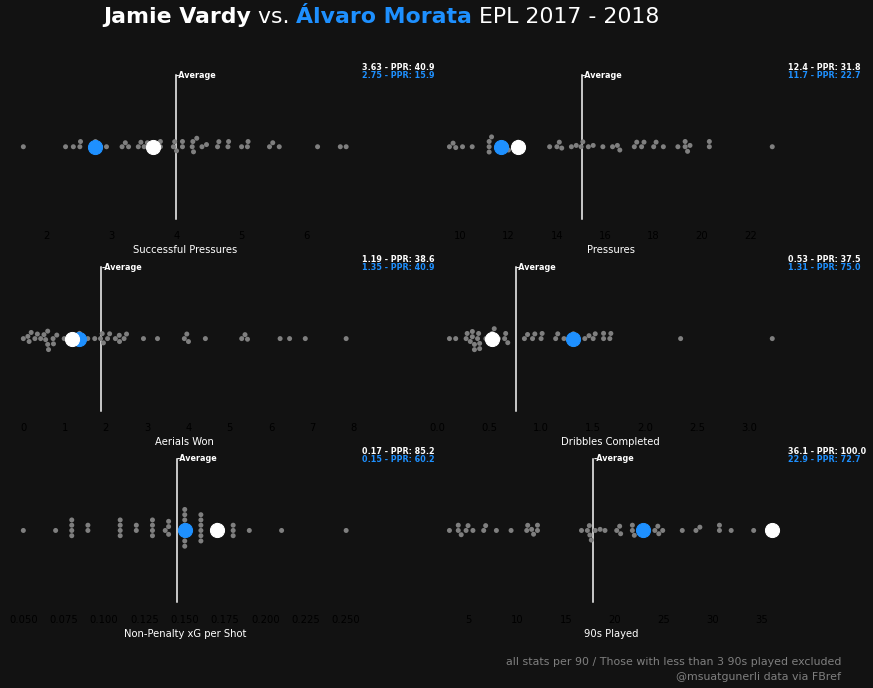

In [18]:
fig,axes = plt.subplots(3,2,figsize=(14,10))
fig.set_facecolor('#121212')

mpl.rcParams['xtick.color'] = 'white'
mpl.rcParams['ytick.color'] = 'white'

counter=0
counter2=0 
met_counter = 0

for i,ax in zip(df['Player'],axes.flatten()):
    ax.set_facecolor('#121212')
    ax.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=1)

    spines = ['top','bottom','left','right']
    for x in spines:
        if x in spines:
            ax.spines[x].set_visible(False)

    ax.tick_params(axis=u'both', which=u'both',length=0)
    
    #Graph 1
    #ax = df[metrics[met_counter]].plot.kde(ax=axes[counter,counter2], zorder=2,color='white')
    #l1 = ax.lines[0]
    #x1 = l1.get_xydata()[:,0]
    #y1 = l1.get_xydata()[:,1]
    #ax.fill_between(x1,y1, color="#7F7F7F", alpha=0.3)

    #Graph 2
    sns.swarmplot(x=metrics[met_counter],data=df,ax=axes[counter,counter2],zorder=2,color='#7F7F7F')
    
    #Graph 3
    #sns.violinplot(x=metrics[met_counter],data=df,ax=axes[counter,counter2],inner = None, zorder=2,color='#7F7F7F')

    per_50 = np.percentile(df[metrics[met_counter]],50)
    ax.axvline(x=per_50,ymin=0.05, ymax=0.95,color='white',zorder=1, linewidth=1.5, ls='-', alpha = 1)
    ax.text(s='-Average',x=per_50,y=-0.43675,c='white',weight='bold', size=8, alpha = 1)

    ax.set_xlabel(f'{metrics[met_counter]}',c='white')

    for x in range(len(df['Player'])):
        if df['Player'][x] == Player_1:
            ax.scatter(x=df[metrics[met_counter]][x],y=0,s=200,c=Color_1,zorder=3)
            #ax.text(s= str(Player_1),x=df[metrics[met_counter]][x],y=-.08,c=Color_1,size=8)
            
            per_player1 = sp.stats.percentileofscore(df[metrics[met_counter]],df[metrics[met_counter]][x])
            text(1, 1, str(round(df[metrics[met_counter]][x],2)) + ' - PPR: '+ str(round(per_player1,1)), ha='left', va='center', color=Color_1, transform=ax.transAxes, weight='bold', size=8)

        if df['Player'][x] == Player_2:
            ax.scatter(x=df[metrics[met_counter]][x],y=0,s=200,c=Color_2,zorder=3)
            #ax.text(s= str(Player_2), x=df[metrics[met_counter]][x],y=-.08,c=Color_2,size=8)

            per_player2 = sp.stats.percentileofscore(df[metrics[met_counter]],df[metrics[met_counter]][x])
            text(1, 0.95, str(round(df[metrics[met_counter]][x],2))+ ' - PPR: '+ str(round(per_player2,1)), ha='left', va='center', color=Color_2, transform=ax.transAxes, weight='bold', size=8)

    met_counter+=1
    if counter2 == 0:
        counter2 = 1
        continue #break out of the current iteration and go to the top, yoksa bire set edip tekrar sıfıra dönecekti
    if counter2 == 1:
        counter2 = 0
        counter+=1

s = f"<{Player_1}> vs. <{Player_2}> {Competition} {Season}"
highlight_text.fig_text(s=s,
                x=.22, y=0.95,
                highlight_weights = ['bold'],
                **myfont,
                fontsize=22,
                #fontfamily = 'Andale Mono',
                color = 'white',
                highlight_colors = [Color_1, Color_2], #oyuncu adı rengi buraya
                va='center',
                zorder=3
               )

fig.text(.62,.05,"all stats per 90 / Those with less than 3 90s played excluded",fontsize=11, fontfamily='Andale Mono',color='#7F7F7F')
fig.text(.788,.03,"@msuatgunerli data via FBref",fontsize=11, fontfamily='Andale Mono',color='#7F7F7F')

#plt.savefig('test.png',dpi=500,bbox_inches = 'tight',facecolor=background)


In [20]:
# PARAMETERS - Select 13 and include PLAYER and TEAM ----------------------------------------------------------------------------------------------------------------------------------------------------------------

#Goalkeepers

#df = df[['Player','Team','GK Saves','GK Save %','GK Post-Shot xG Against per Shot on Target','GK Post-Shot xG Against PlusMinus', 'GK Long Passes Completed', 'GK Long Pass Preference %', 'GK Average Pass Length (Yd)', 'GK Long Goal Kick Preference %','GK Average Goal Kick Length (Yd)', 'GK Sweeping Actions', 'GK Average Sweeping Action Distance From Goal (Yd)']]
#df.columns = ['Player','Team','Saves','Save %','PSxG / SoT','PSxG +/-', 'Long Passes Cmp', 'Long Pass Pref %', 'Avg Pass Length (Yd)', 'Long GK Pref %','Avg GK Length (Yd)', 'Sweeping Actions', 'Avg Sweeping Dist (Yd)']
#Centerbacks

#df = df[['Player','Team','Pass Completion %', 'Pressures','Fouls Committed','Tackle Success %','Tackles Won','Interceptions','Aerials Won','Aerial Win %','Short Passes Completed','Long Passes Completed','Goal Contributions per 90']]
#df.columns = ['Player','Team','Pass Completion %', 'Pressures','Fouls Committed','Tackle Success %','Tackles Won','Interceptions','Aerials Won','Aerial Win %','Short Passes Cmp','Long Passes Cmp','Goal Contributions']

#Fullbacks

#df = df[['Player','Team','Tackles + Interceptions','Pressures', 'Deep Progressions','Share of Touches in the Final Third %','Pass Completion %','Goal Contributions per 90','Dribbles Completed', 'Turnovers', 'Aerials Won', 'Crosses Completed into Opposition Box', 'Tackle Success %']]
#df.columns = ['Player', 'Team','Tackles + Interceptions','Pressures', 'Deep Progressions','Touches Final Third %','Pass Completion %','Goal Contributions','Dribbles Completed', 'Turnovers', 'Aerials Won', ' Crosses Cmp into Box', 'Tackle Success %']

#Midfielders

#df = df[['Player','Team', 'Passes Completed','Pass Completion %','Deep Progressions','xA', 'Goal Contributions per 90', 'Dribbles Completed','Fouls Won','Turnovers','Successful Pressures', 'Pressures', 'Tackles + Interceptions']]
#df.columns = ['Player','Team', 'Passes Cmp','Pass Completion %','Deep Progressions','xA', 'Goal Contributions', 'Dribbles Completed','Fouls Won','Turnovers','Successful Pressures', 'Pressures', 'Tackles + Interceptions']

#Attacking Midfielders/Wingers

#df = df[['Player','Team', 'Non-Penalty xG','Shots', 'Touches In Opposition Box', 'Pass Completion %', 'Crosses Completed into Opposition Box', 'xA','Fouls Won','Dribbles Completed','Turnovers', 'Successful Pressures', 'Goals per Shot']]
#df.columns = ['Player','Team', 'npxG','Shots', 'Touches In Opp. Box', 'Pass Completion %', 'Crosses Cmp into Box', 'xA','Fouls Won','Dribbles Completed','Turnovers', 'Successful Pressures', 'Goals per Shot']

#Strikers

df = df[['Player','Team', 'Non-Penalty xG','Goals - xG','Shots','Touches In Opposition Box','Shots per Touch', 'xA','Successful Pressures','Pressures','Aerials Won','Dribbles Completed','Non-Penalty xG per Shot']]
df.columns = ['Player','Team', 'Non-Penalty xG','Goals - xG','Shots','Touches In Opp. Box','Shots per Touch', 'xA','Successful Pressures','Pressures','Aerials Won','Dribbles Completed','npxG per Shot']

In [21]:
dfcomp = df

In [22]:
df = df[(df['Player']==Player_1) | (df['Player']==Player_2)].reset_index(drop=True)
df

,Player,Team,Non-Penalty xG,Goals - xG,Shots,Touches In Opp. Box,Shots per Touch,xA,Successful Pressures,Pressures,Aerials Won,Dribbles Completed,npxG per Shot
0,Álvaro Morata,Chelsea,0.55,-0.07,3.62,6.99,0.089163,0.15,2.75,11.7,1.35,1.31,0.15
1,Jamie Vardy,Leicester City,0.31,0.12,1.77,4.40,0.080822,0.07,3.63,12.4,1.19,0.53,0.17


In [23]:
for w in range(len(df['Player'])):
    if df['Player'][w] == Player_1:
        Team_1 = df.iloc[w].values.tolist()
Team_1 = Team_1[1]

for w in range(len(df['Player'])):
    if df['Player'][w] == Player_2:
        Team_2 = df.iloc[w].values.tolist()
Team_2 = Team_2[1]

In [24]:
df = df.drop(['Team'], axis=1)

In [25]:
params = list(df.columns)
params = params[1:]

In [26]:
per_25 = []
per_50 = []
per_75 = []
PPR_1 = []
PPR_2 = []
labels = []
per_player1 = []
per_player2 = []
    
for i in range(len(params)):
   
    per_25v = np.percentile(dfcomp[params[i]],25)
    per_25.append(per_25v)

    per_50v = np.percentile(dfcomp[params[i]],50)
    per_50.append(per_50v)

    per_75v = np.percentile(dfcomp[params[i]],75)
    per_75.append(per_75v)

    label = f'{params[i]}'
    labels.append(label)

    for x in range(len(df['Player'])):
        if df['Player'][x] == Player_1:
            per_player1.append(sp.stats.percentileofscore(dfcomp[params[i]],dfcomp[params[i]][x]))

        if df['Player'][x] == Player_2:
            per_player2.append(sp.stats.percentileofscore(dfcomp[params[i]],dfcomp[params[i]][x]))

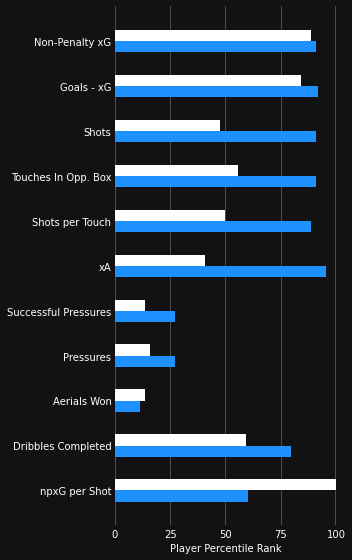

In [27]:
#plt.rcdefaults()
fig, ax = plt.subplots(figsize=(5,7.89))

fig.set_facecolor('#121212')
ax.set_facecolor('#121212')

spines = ['top','bottom','left','right']
for x in spines:
    if x in spines:
        ax.spines[x].set_visible(False)

y = labels
y_pos = np.arange(len(labels))
width = 0.25

plt.axvline(0,linewidth=2, color='white', alpha = 0.25, zorder = 1)
plt.axvline(25,linewidth=1, color='white', alpha = 0.25, zorder = 1)
plt.axvline(50,linewidth=1, color='white', alpha = 0.25, zorder = 1)
plt.axvline(75,linewidth=1, color='white', alpha = 0.25, zorder = 1)
plt.axvline(100,linewidth=2, color='white', alpha = 0.25, zorder = 1)

rects1 = ax.barh(y_pos - width/2, per_player1, width, color = Color_1, alpha = 1, zorder = 2)
rects2 = ax.barh(y_pos + width/2, per_player2, width, color = Color_2, alpha = 1, zorder = 2)

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.xlim([0, 100])
plt.xticks([0,25,50,75,100])
ax.set_yticks(y_pos)
ax.set_yticklabels(labels, size = 10)
ax.invert_yaxis()
ax.set_xlabel('Player Percentile Rank', size = 10, color = 'white')

fig.tight_layout()

plt.show()

In [28]:
ranges = []
a_values = []
b_values = []

for x in params:
    a = min(df[params][x])
    a = a - (a*.25)
    
    b = max(df[params][x])
    b = b + (b*.10)
    
    ranges.append((a,b))
    
for x in range(len(df['Player'])):
    if df['Player'][x] == Player_1:
        a_values = df.iloc[x].values.tolist()
    if df['Player'][x] == Player_2:
        b_values = df.iloc[x].values.tolist()
        
a_values = a_values[1:]
b_values = b_values[1:]

values = [a_values,b_values]

In [29]:
title = dict(
    title_name= Player_1,
    title_color = Color_1,
    subtitle_name = str(Team_1) + ' ' + str(Season) ,
    subtitle_color = Color_1,
    title_name_2= Player_2,
    title_color_2 = Color_2,
    subtitle_name_2 = str(Team_2) + ' ' + str(Season),
    subtitle_color_2 = Color_2,
    title_fontsize = 18,
    subtitle_fontsize = 15
)

endnote = '@msuatgunerli - all stats per90, data via FBref'

findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.


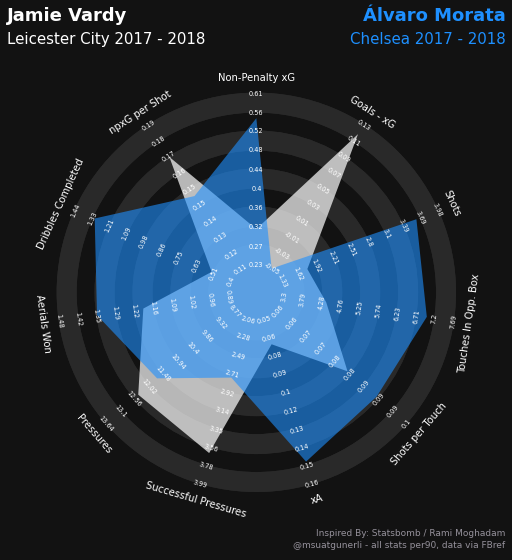

In [30]:
radar = Radar(background_color="#121212", patch_color="#292929", label_color="#FFFFFF", range_color="#FFFFFF")

fig,ax = radar.plot_radar(ranges=ranges,params=params,values=values,
                         radar_color=[Color_1,Color_2],
                         alphas=[0.7,0.6],title=title,endnote=endnote,
                         compare=True)